<a href="https://colab.research.google.com/github/alaanagy/Monoalphabetic-Substitution-Encryption/blob/master/Classification_of_7_sorts_of_images_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of 7 sorts of images using CNN
# by : Alaa Nagy
Data link 1 :  https://www.kaggle.com/puneet6060/intel-image-classification                            
Data link 2 :  https://github.com/Ferlix/Cat-faces-dataset



In [0]:
#import libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import glob as gb 
import os

Using TensorFlow backend.


After uploading the data file as zipped one,Now, Let's extracting the zipped file of data

In [3]:
from zipfile import ZipFile
file_name = "data.zip"

with ZipFile (file_name , 'r') as zip:
  zip.extractall()
  print("process done ")

process done 


opening folders of data to see it's content

1.training data


In [8]:
train_list = []
trainpath = '/content/data/train' 
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in files:
        train_list.append(list (file) )
        
    print(f'For training data , found {len(files)} in folder {folder}')
print('\n total samples of training data =', len(train_list) )

For training data , found 2271 in folder forest
For training data , found 2382 in folder street
For training data , found 2530 in folder cat
For training data , found 2274 in folder sea
For training data , found 2191 in folder buildings
For training data , found 2512 in folder mountain
For training data , found 2404 in folder glacier

 total samples of training data = 16564


Now, Let's see the size of all samples of training set , (150,150) is the most size 

In [14]:
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(375, 499, 3)      319
(374, 500, 3)      319
(239, 320, 3)       30
(499, 375, 3)       26
                 ...  
(58, 90, 3)          1
(370, 499, 3)        1
(239, 319, 3)        1
(499, 424, 3)        1
(337, 400, 3)        1
Length: 1357, dtype: int64

2. Testing data

In [9]:
test_list = []
testpath =  '/content/data/test' 
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    for file in files:
        test_list.append(list (file) )
    print(f'For testing data , found {len(files)} in folder {folder}')
print('\n total samples of testing data =', len(test_list) )

For testing data , found 474 in folder forest
For testing data , found 501 in folder street
For testing data , found 803 in folder cat
For testing data , found 510 in folder sea
For testing data , found 437 in folder buildings
For testing data , found 525 in folder mountain
For testing data , found 553 in folder glacier

 total samples of testing data = 3803


In [15]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath+'/' +folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(375, 499, 3)     111
(374, 500, 3)      91
(333, 499, 3)      12
(239, 320, 3)       7
                 ... 
(383, 391, 3)       1
(383, 384, 3)       1
(300, 246, 3)       1
(244, 199, 3)       1
(220, 199, 3)       1
Length: 523, dtype: int64

3. Predicting data

In [10]:
predpath = '/content/data/pred' 
files = gb.glob(pathname= str( predpath +'/' + '/*.jpg'))
print(f'For predicting data , found {len(files)} ')

For predicting data , found 8721 


In [16]:
size = []
files = gb.glob(pathname= str(predpath +'/'+ '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(374, 500, 3)     175
(375, 499, 3)     159
(499, 375, 3)      21
(240, 319, 3)      13
                 ... 
(499, 356, 3)       1
(225, 500, 3)       1
(89, 54, 3)         1
(199, 185, 3)       1
(423, 371, 3)       1
Length: 863, dtype: int64

# 2.Helper function
1.we make a dictionary to change from names of folders (strings) into numbers or labels to assign them to y_train array

2.we will make a helper function which is the inverse operation of the dictionary, i mean conversion dictionary take keys as argument then return the value 
for example , conversion['cat'] = 1 .

so this function make the inverse operation , take the value as an argument and return the key for example function(1) = 'cat' 

In [13]:
conversion = {'buildings':0 , 'cat':1 ,'forest':2,'glacier':3,'mountain':4,'sea':5,'street':6 }

def inverse_conversion (j):
    for i,k in conversion.items():
        if j == k:
            return i
#example 
print(conversion['buildings'])   # it will print for you 0 value 
inverse_conversion(3)     # it should give you 'glacier'

0


'glacier'

# Reading and resize images
1.first we read all images, put them into lists 

in oreder to fed the CNN with photos ,all photos must have the same size, 

2.so we resize all images with opencv library,
by increasing size, accuracy increase but training time will increase and vice versa. It is a tradeoff!

3.s is a variable refer to new size of images, I make it (150,150) as most of samples data are (150,150) 

it will take a few minutes to finish 

In [0]:
s = 150
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s) )
        X_train.append(list(image_array))
        y_train.append(conversion[folder]) # here we use the dictionary to assign labels to y_train

Now, how about seeing random samples of training data.

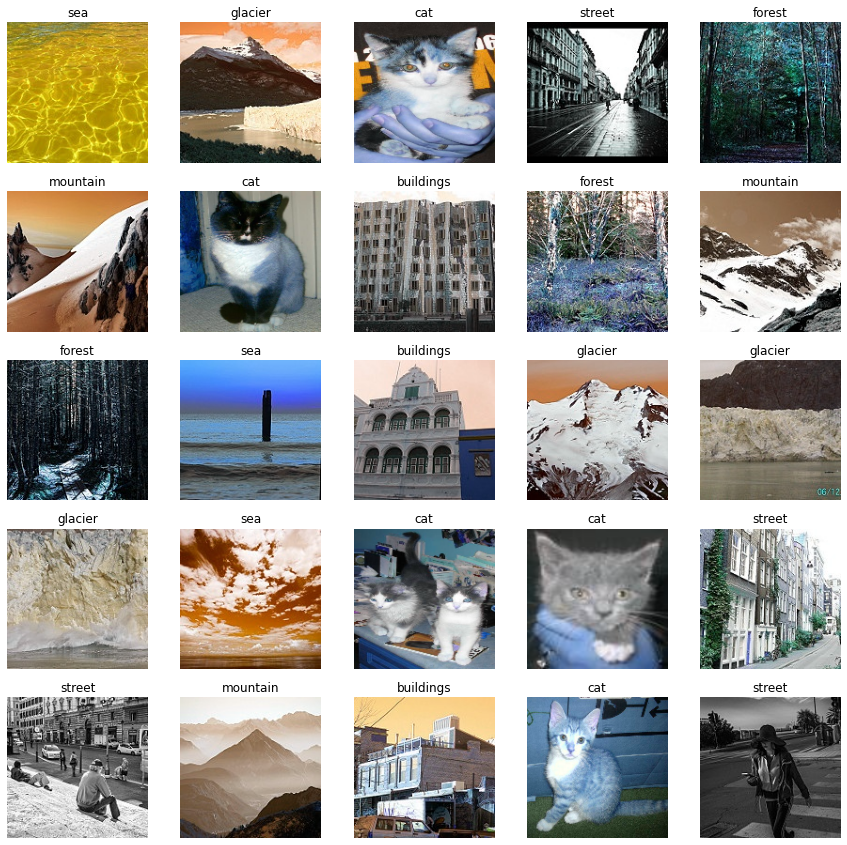

In [18]:
#plotting random samples from training data 
plt.figure(figsize=(15,15))
for n , i in enumerate (np.random.randint(0,len(X_train),25)) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])   
    plt.title(inverse_conversion(y_train[i]))
    plt.axis('off')

I will do the same thing for testig data as below

In [0]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s) )
        X_test.append(list(image_array))
        y_test.append(conversion[folder]) # here we use the dictionary to assign labels to y_train

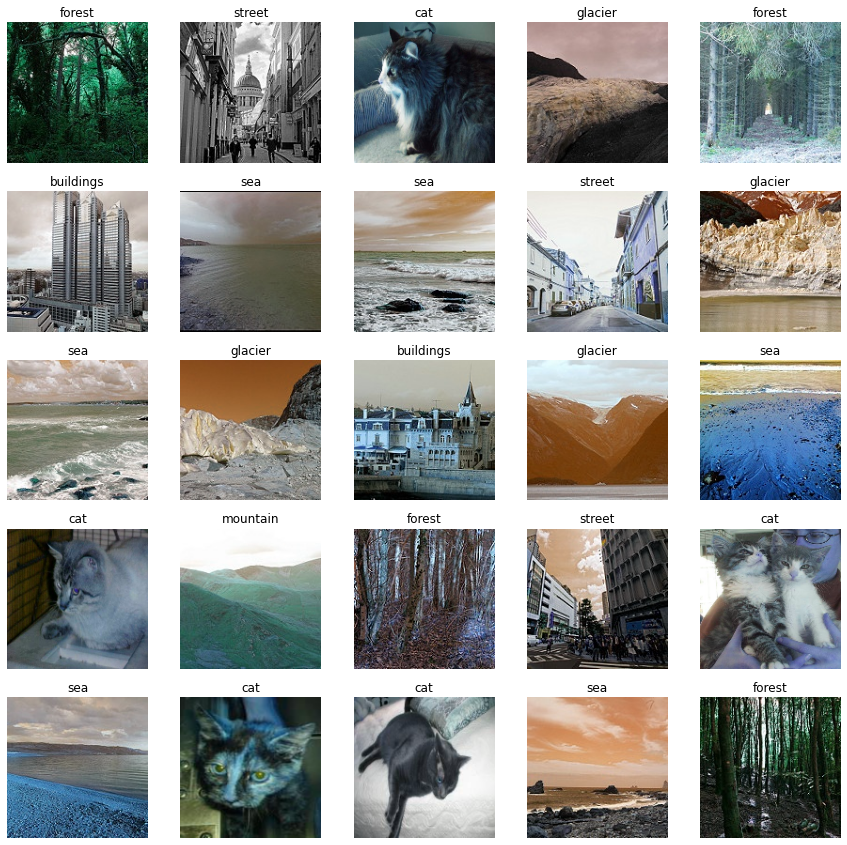

In [36]:
#plotting random samples from testing data 
plt.figure(figsize=(15,15))
for n , i in enumerate (np.random.randint(0,len(X_test),25)) :  
    plt.subplot(5,5,n+1)
    plt.imshow(X_test[i])  
    plt.title(inverse_conversion(y_test[i]))
    plt.axis('off')

Finally, we do the same thing for predicting data but here we will not use inverse_conversion function as it is our task of this algorithm to predict the category of a given certain image from predicting data !

In [0]:
X_pred = []
files = gb.glob(pathname= str( predpath +'/' + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

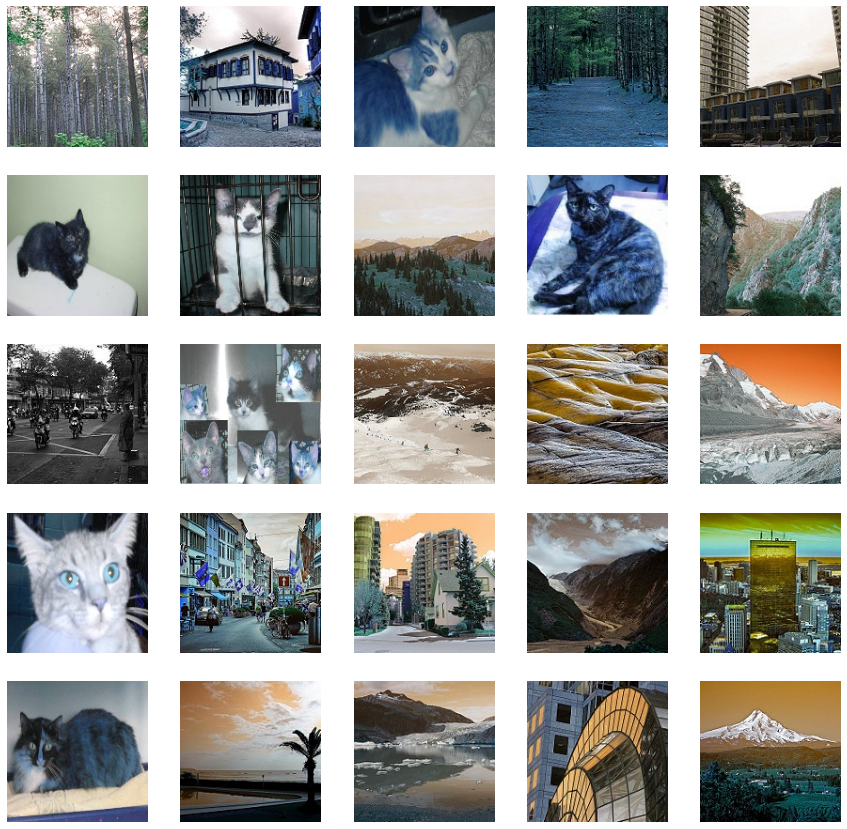

In [26]:
#plotting random samples from predicting data 
plt.figure(figsize=(15,15))
for n , i in enumerate (np.random.randint(0,len(X_pred),25)) :  
    plt.subplot(5,5,n+1)
    plt.imshow(X_pred[i])  
    plt.axis('off')

convert data lists into arrays to build the model

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (16564, 150, 150, 3)
X_test shape  is (3803, 150, 150, 3)
X_pred shape  is (8721, 150, 150, 3)
y_train shape  is (16564,)
y_test shape  is (3803,)


# Building the model 
let's build a cnn to train model and tune hyperparameters using keras library 

In [0]:
model = keras.models.Sequential([
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(5,5),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,        
        keras.layers.Dropout(rate=0.3) ,            
        keras.layers.Dense(7,activation='softmax') ,    
        ])

we will complie model using AdampOptimizer and sparse_categorical_crossentropy loss and see a breif summary for the model and each layers in the following two lines of code

In [29]:
model.compile(optimizer = 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 256)     7168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 128)     295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 144, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       295040    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)      

In [31]:
epochs = 50
model_trained= model.fit(X_train, y_train, epochs=epochs,batch_size= 64,verbose=1)

16564/16564 [==============================] - 245s 15ms/step - loss: 0.0889 - accuracy: 0.9723
Epoch 38/50
16564/16564 [==============================] - 244s 15ms/step - loss: 0.0933 - accuracy: 0.9727
Epoch 39/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 40/50
16564/16564 [==============================] - 244s 15ms/step - loss: 0.1319 - accuracy: 0.9584
Epoch 41/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0745 - accuracy: 0.9770
Epoch 42/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0869 - accuracy: 0.9744
Epoch 43/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0810 - accuracy: 0.9764
Epoch 44/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0719 - accuracy: 0.9781
Epoch 45/50
16564/16564 [==============================] - 245s 15ms/step - loss: 0.0638 - accuracy: 0.9808
Epoch 46/50
16564/16564 [===============

ResourceExhaustedError: ignored

# save model

In [0]:
model.save('my_model_1.h5')

Evaluating accuracy of test

In [42]:
loss , acc = model.evaluate (X_test,y_test)
print ('test loss is {}'.format(loss))
print ('test accuracy is {}'.format(acc))

3803/3803 [==============================] - 17s 4ms/step
test loss is 1.3512815264870086
test accuracy is 0.8480147123336792


we have here overfitting as the accuarcy of training is 98% but the accuracy of testing is 84.5%
to reduce overfitting, we have to 

1.increasing number of samples of data

2.make more  Regularization

3.modify the cnn architecture

In [45]:
y_pred = model.predict(X_test)
print('prediction shape is :',y_pred.shape)

y_result = model.predict (X_pred)
print('prediction shape is :',y_result.shape)

prediction shape is : (3803, 7)
prediction shape is : (8721, 7)


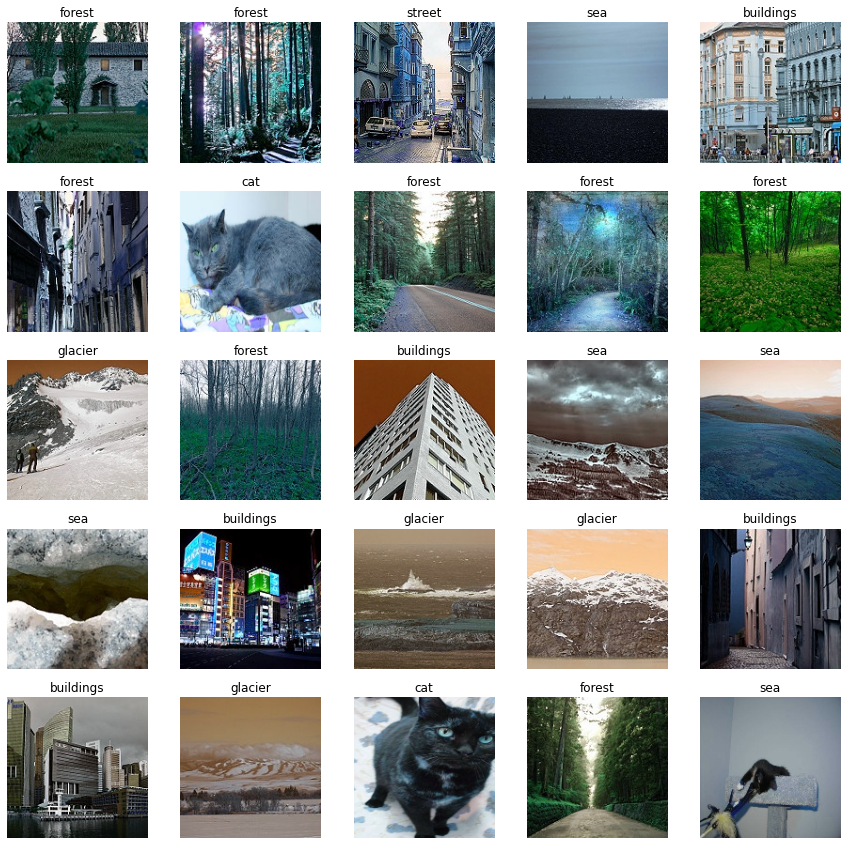

In [46]:
#plotting random samples from predicting data 
plt.figure(figsize=(15,15))
for n , i in enumerate (np.random.randint(0,len(X_pred),25)) :  
    plt.subplot(5,5,n+1)
    plt.imshow(X_pred[i])  
    plt.title(inverse_conversion(np.argmax(y_result[i])))
    plt.axis('off')

In [48]:
new_model= keras.models.load_model ('my_model_1.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 256)     7168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 128)     295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 144, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       295040    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)      